In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
import seaborn as sns 
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from numpy import absolute
from numpy import sqrt
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier

In [2]:
data = pd.read_csv("Lung Cancer Dataset (1).csv")
data.head(10)

,GD,AG,SM,YF,AN,PP,CD,FT,AL,WH,AC,CF,SB,SD,CP,LC
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [3]:
data.tail()

,GD,AG,SM,YF,AN,PP,CD,FT,AL,WH,AC,CF,SB,SD,CP,LC
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [4]:
#Shape of Data
data.shape

(309, 16)

In [5]:
data['LC'].value_counts()

YES    270
NO      39
Name: LC, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   GD      309 non-null    object
 1   AG      309 non-null    int64 
 2   SM      309 non-null    int64 
 3   YF      309 non-null    int64 
 4   AN      309 non-null    int64 
 5   PP      309 non-null    int64 
 6   CD      309 non-null    int64 
 7   FT      309 non-null    int64 
 8   AL      309 non-null    int64 
 9   WH      309 non-null    int64 
 10  AC      309 non-null    int64 
 11  CF      309 non-null    int64 
 12  SB      309 non-null    int64 
 13  SD      309 non-null    int64 
 14  CP      309 non-null    int64 
 15  LC      309 non-null    object
dtypes: int64(14), object(2)
memory usage: 38.8+ KB


In [7]:
#lets describe the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AG,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SM,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YF,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
AN,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PP,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CD,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FT,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
AL,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WH,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
AC,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [8]:
data.count()

GD    309
AG    309
SM    309
YF    309
AN    309
PP    309
CD    309
FT    309
AL    309
WH    309
AC    309
CF    309
SB    309
SD    309
CP    309
LC    309
dtype: int64

In [9]:
label_encoder = preprocessing.LabelEncoder()
data['GD']= label_encoder.fit_transform(data['GD'])
  
data['GD'].unique()

array([1, 0])

In [10]:
label_encoder = preprocessing.LabelEncoder()
data['LC']= label_encoder.fit_transform(data['LC'])
  
data['LC'].unique()

array([1, 0])

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GD,309.0,0.524272,0.500221,0.0,0.0,1.0,1.0,1.0
AG,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SM,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YF,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
AN,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PP,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CD,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FT,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
AL,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WH,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


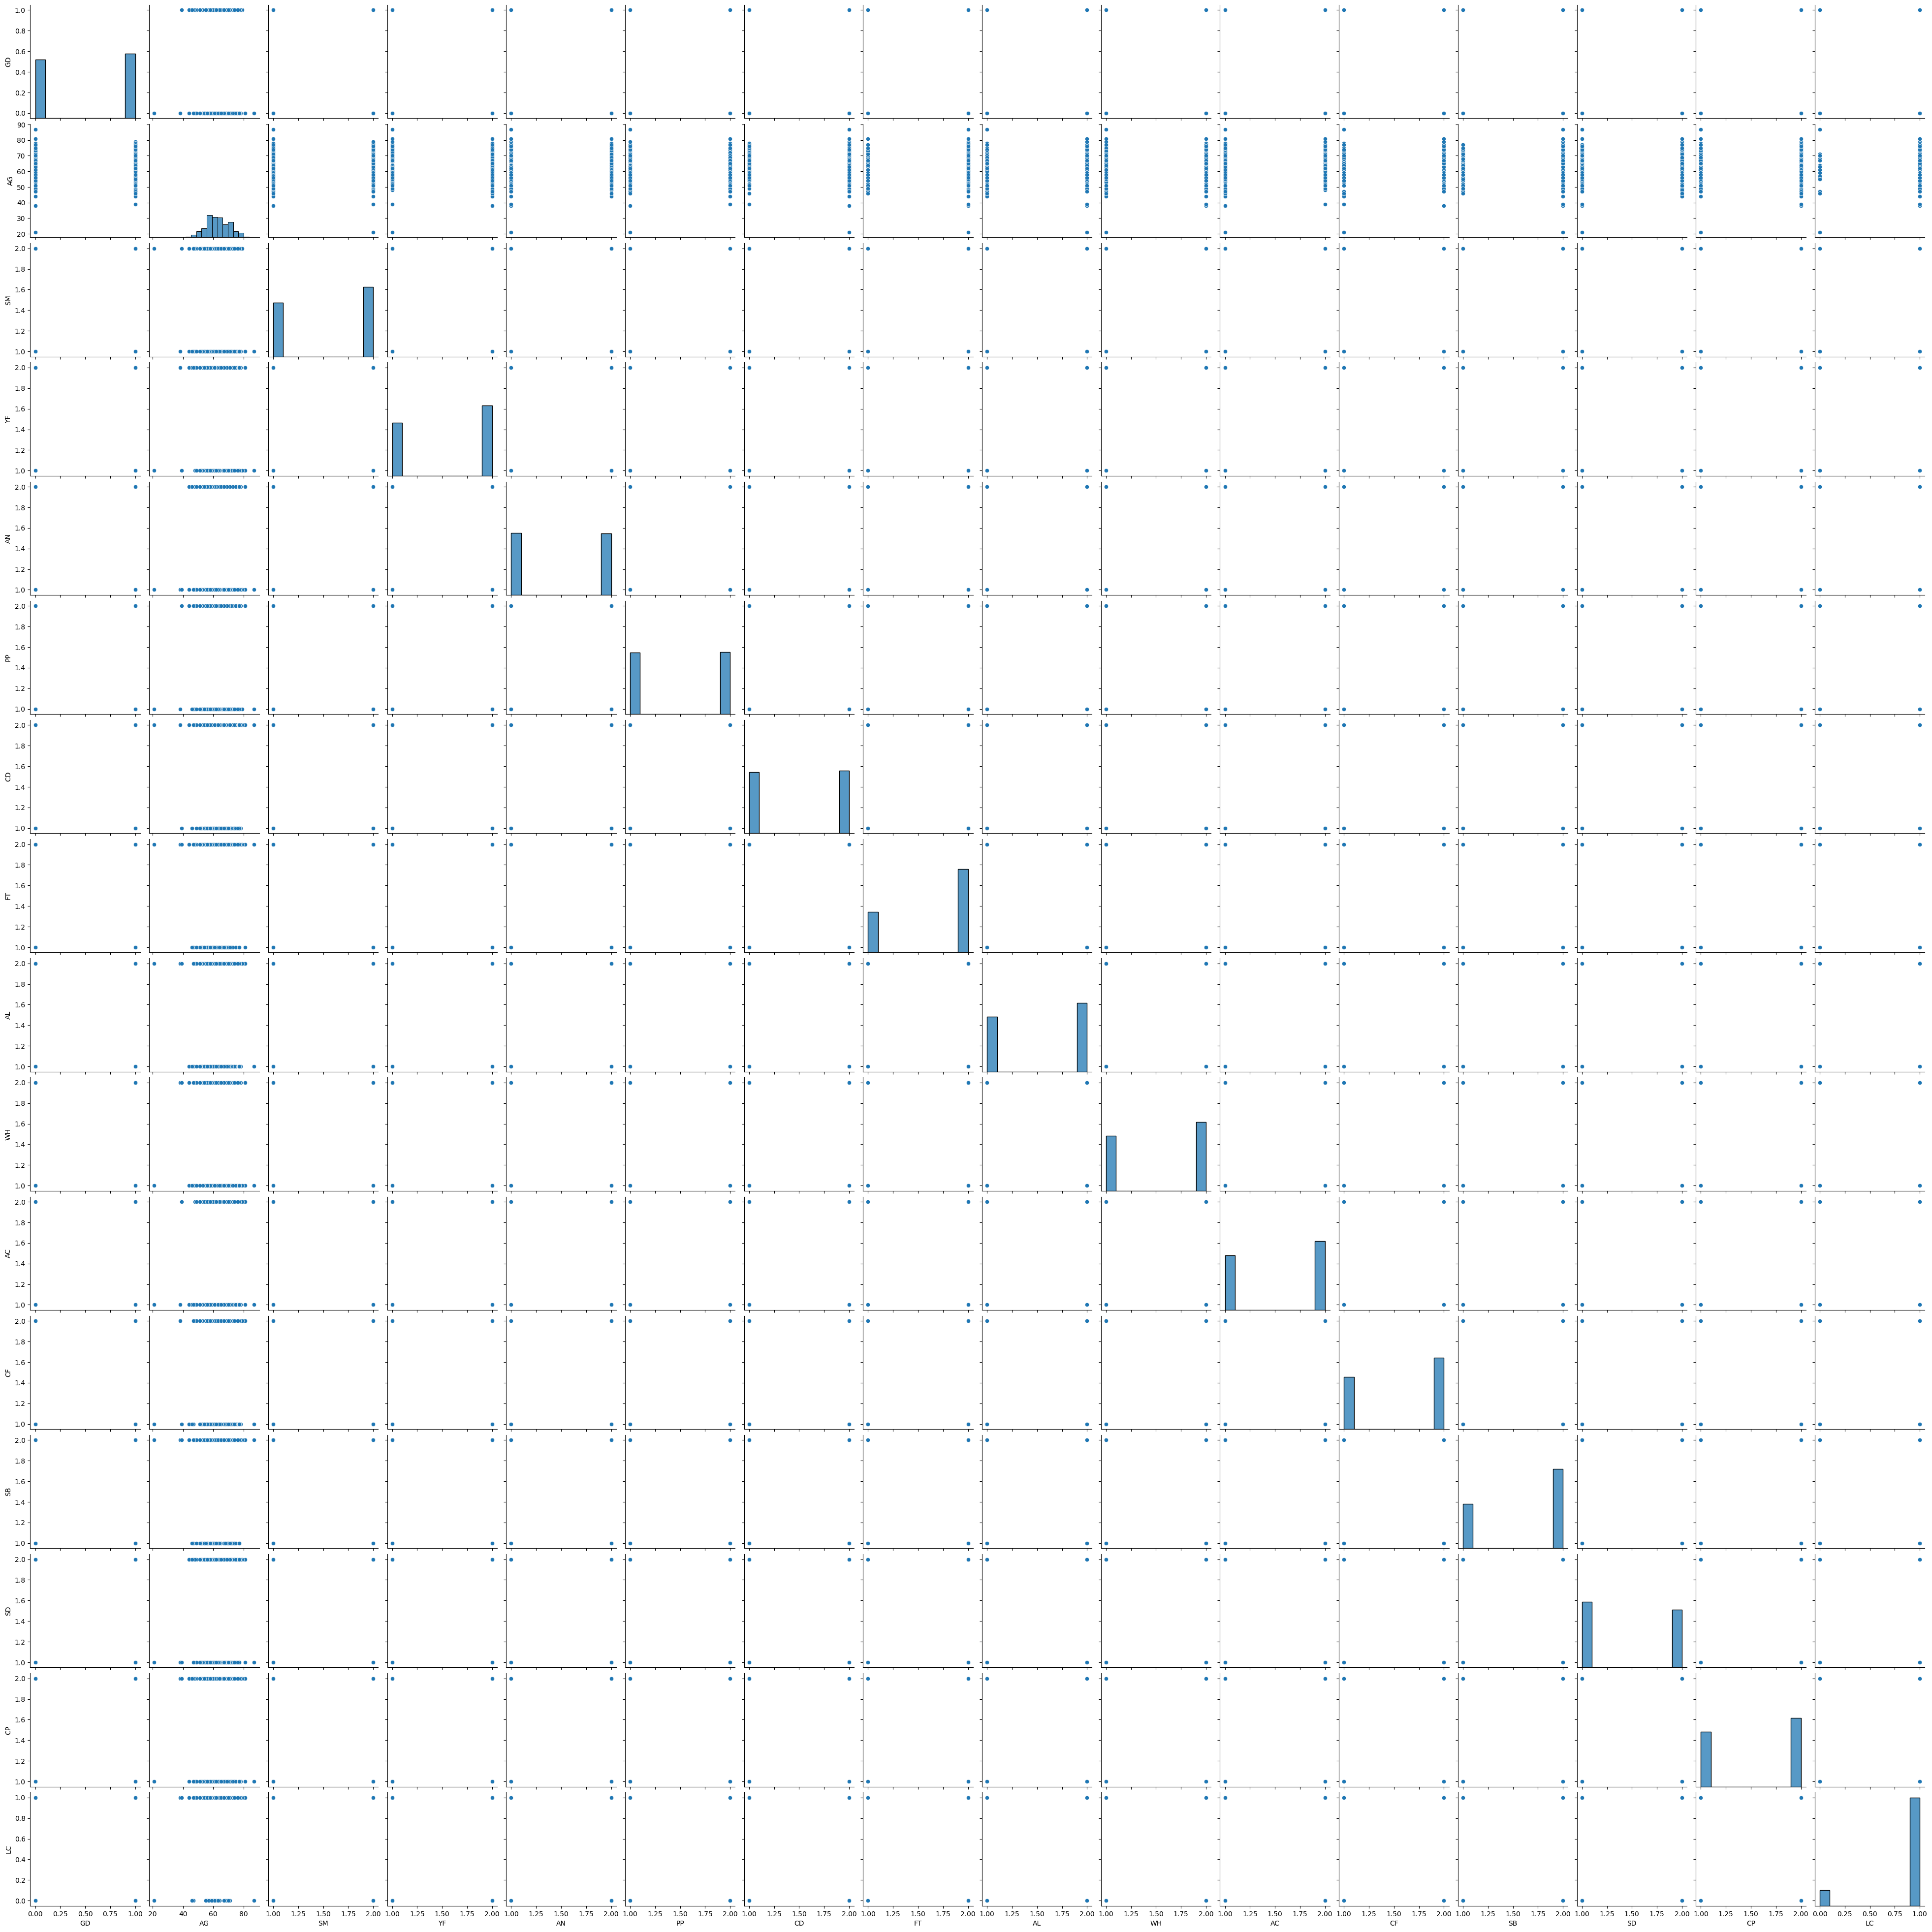

In [12]:
sns.pairplot(data)

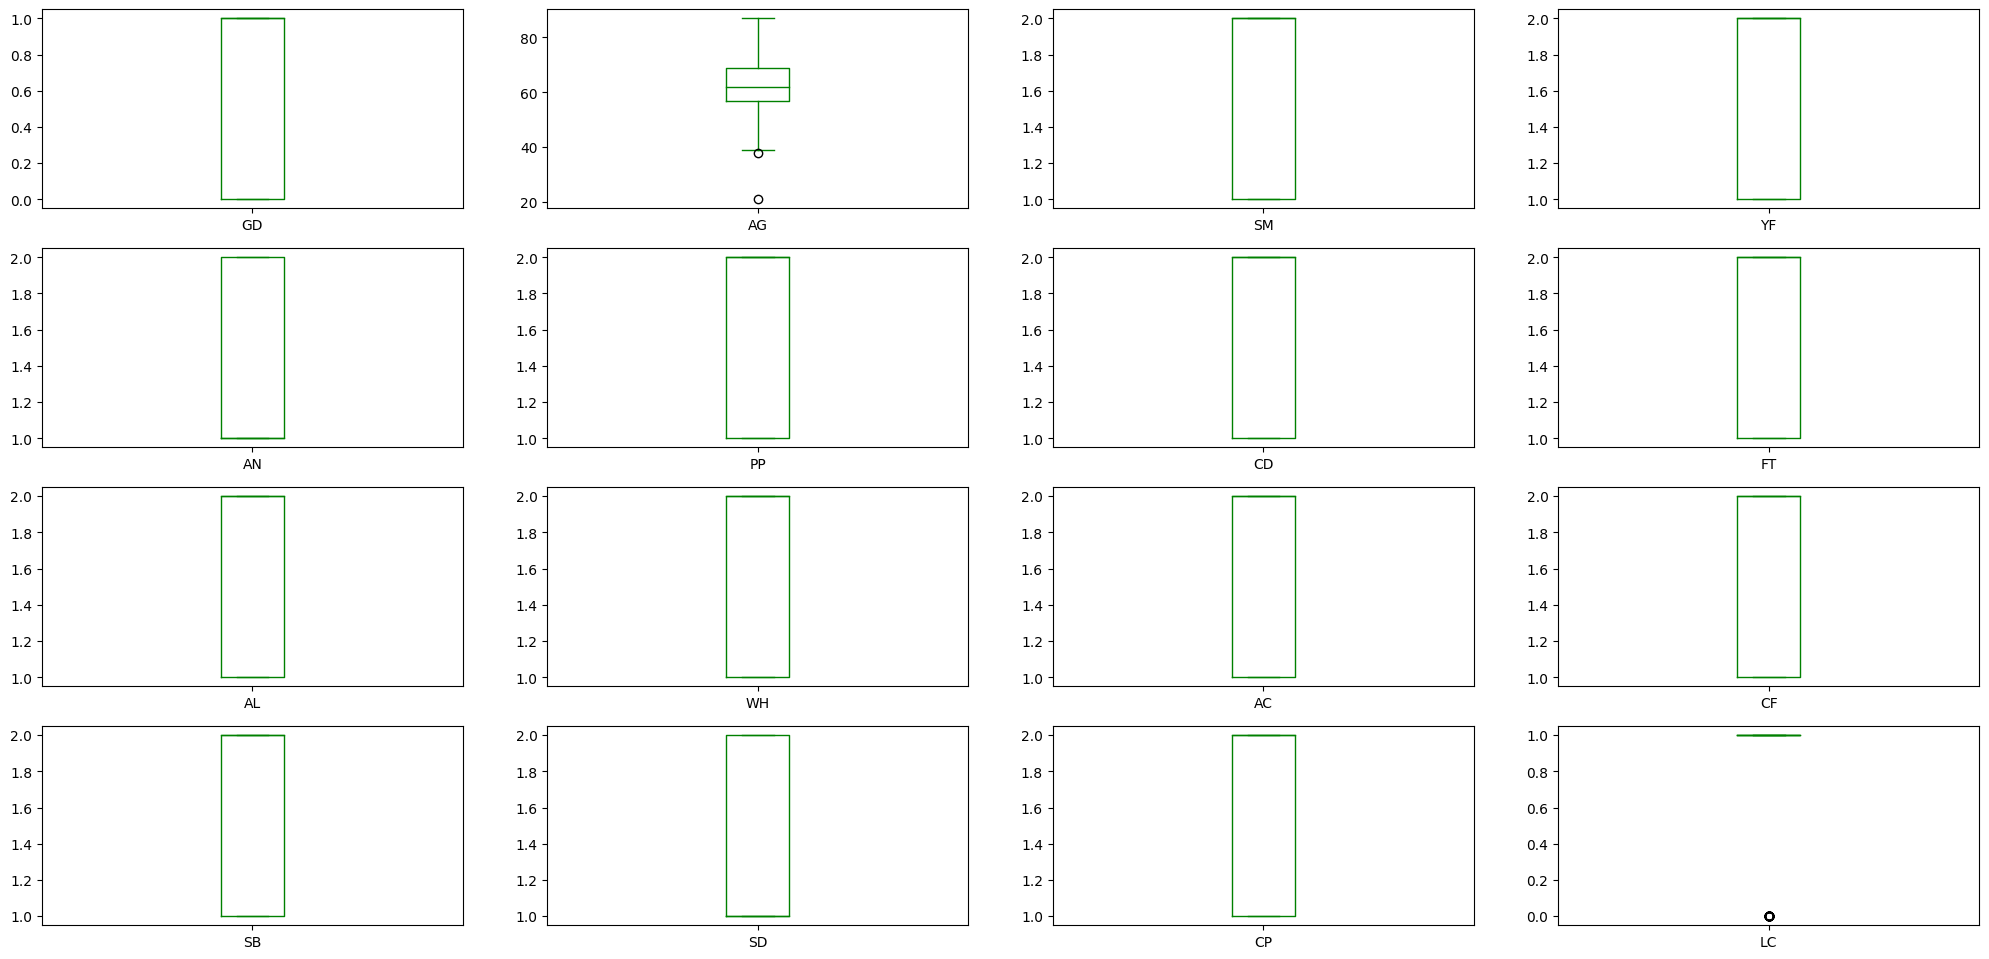

In [13]:
data.plot(color = 'green', kind='box', figsize=(25, 15), subplots=True, layout=(5,4))
plt.show()

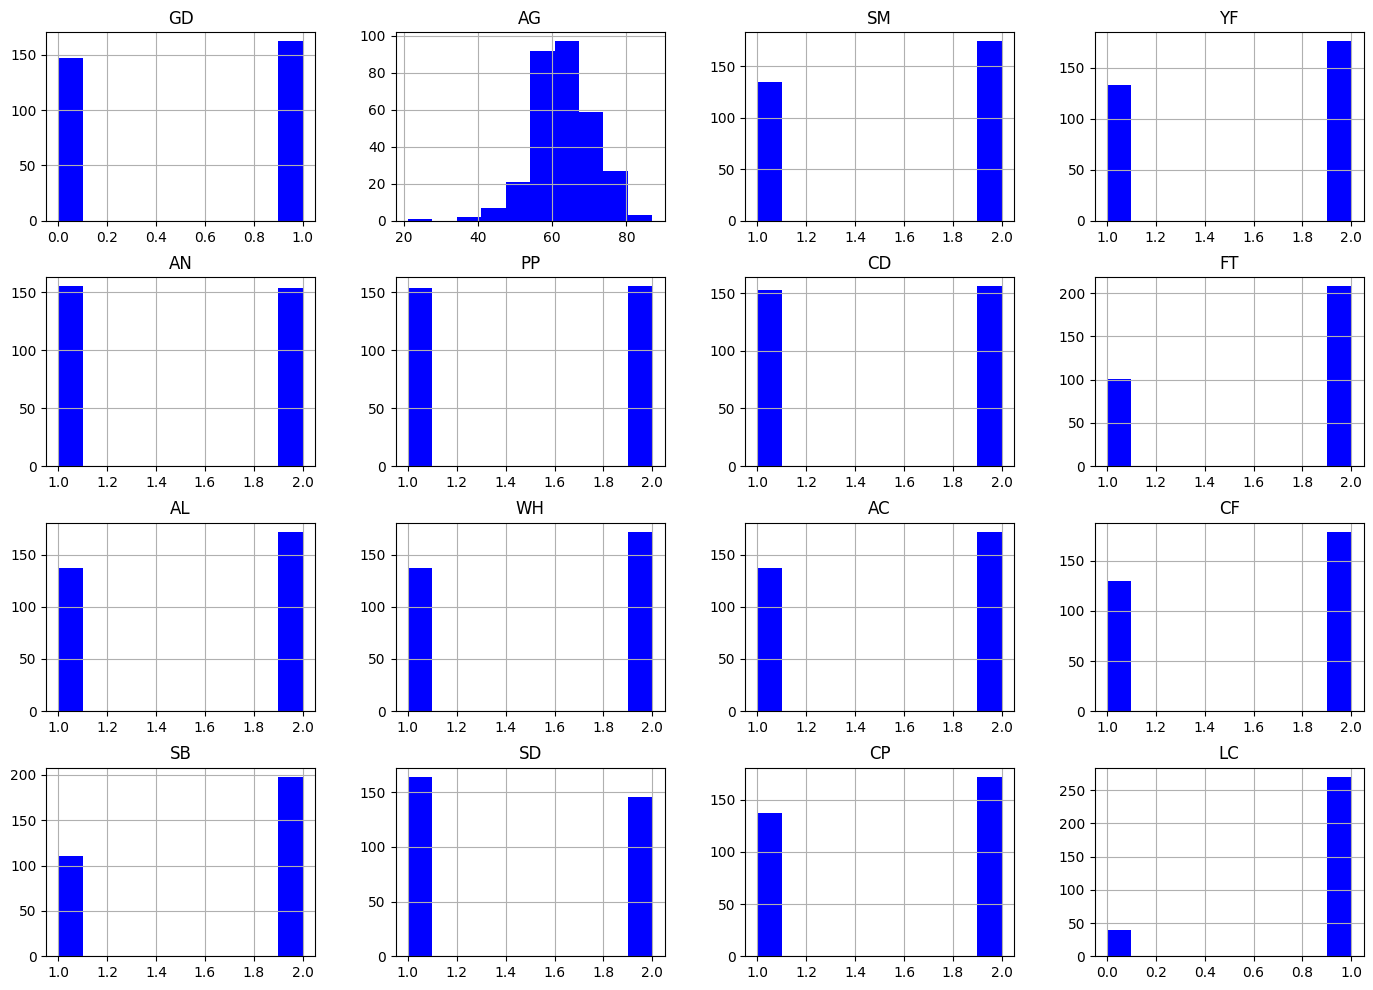

In [14]:
#histogram
data.hist(color='blue',bins=10,figsize=(17,12))
plt.show()

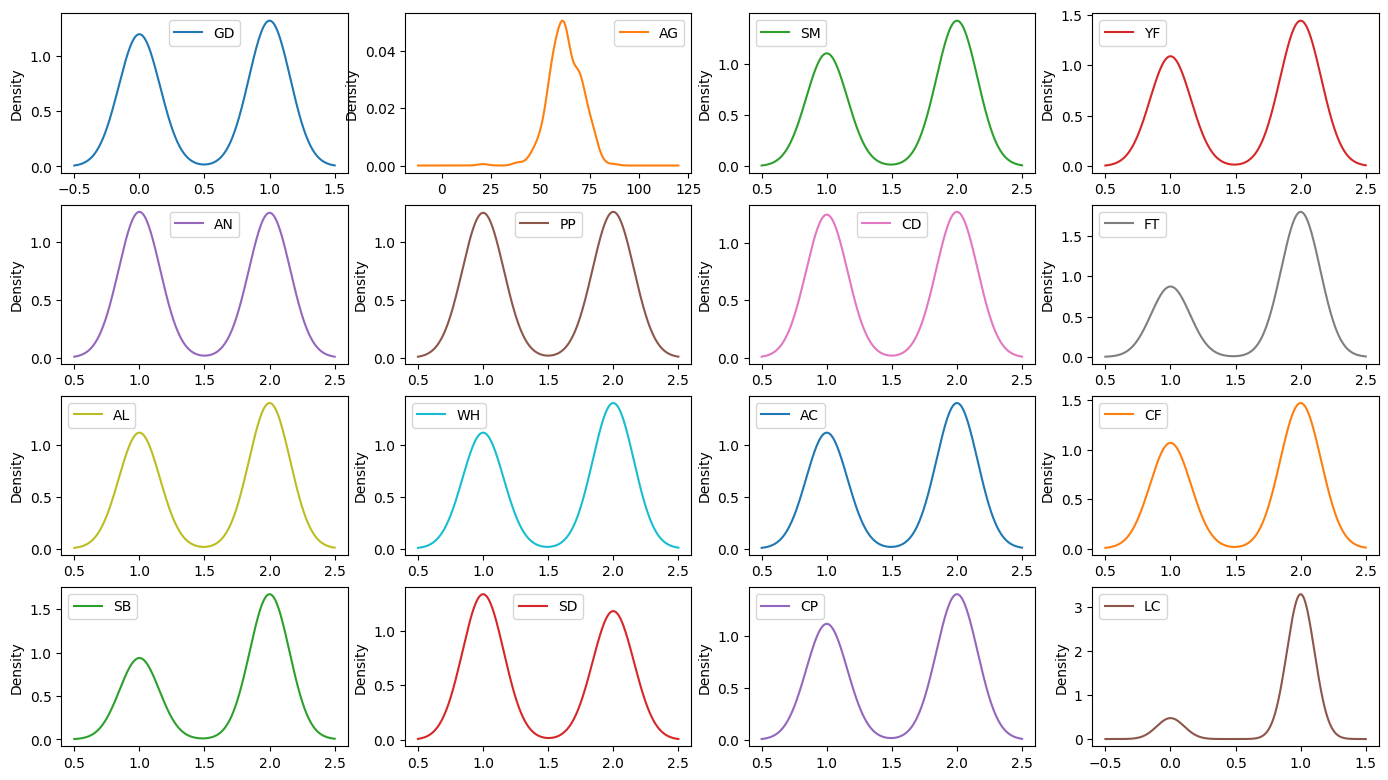

In [15]:
#Boxplot of each column
data.plot( kind='density', figsize=(17,12), subplots=True, layout=(5,4),sharex=False)

plt.show()


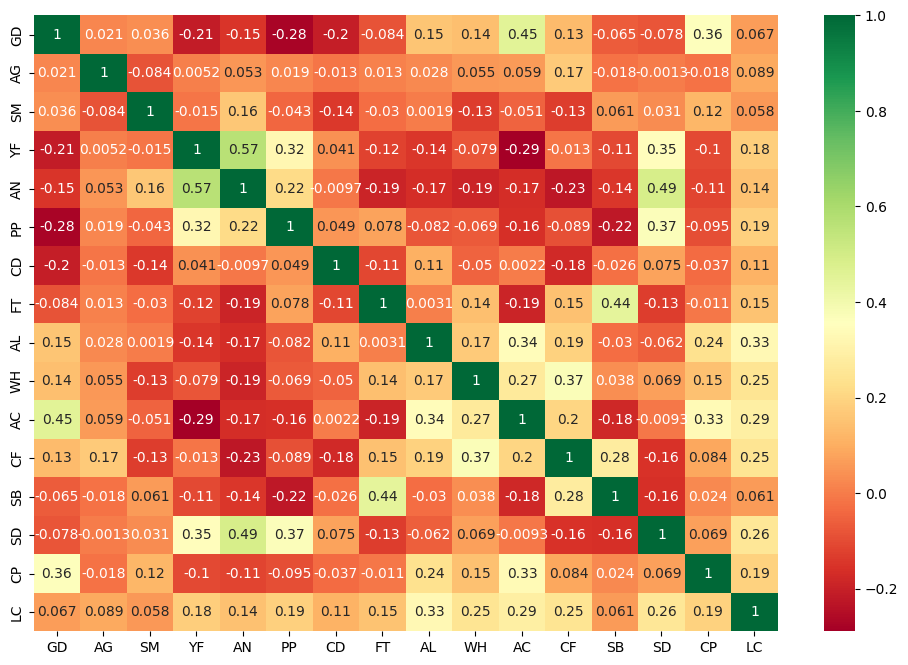

In [16]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
#checking for the out layers with STD
print("Highest allowed",data['AG'].mean() + 3*data['AG'].std())
print("Lowest allowed",data['AG'].mean() - 3*data['AG'].std())

Highest allowed 87.30404332223404
Lowest allowed 38.04223499491807


In [18]:
#dealing with out layer values 
data[(data['AG'] > 87) | (data['AG'] < 45)]


,GD,AG,SM,YF,AN,PP,CD,FT,AL,WH,AC,CF,SB,SD,CP,LC
20,0,44,2,2,2,2,2,2,1,1,1,1,2,2,1,1
22,0,21,2,1,1,1,2,2,2,1,1,1,2,1,1,0
168,1,44,1,2,1,2,2,2,1,2,1,1,2,2,2,1
238,0,38,1,2,1,1,2,2,2,2,1,2,2,1,2,1
261,1,39,2,1,1,2,1,2,2,2,2,1,2,1,2,1


In [19]:
new_df = data[(data['AG'] <87) & (data['AG'] >45)]
new_df

,GD,AG,SM,YF,AN,PP,CD,FT,AL,WH,AC,CF,SB,SD,CP,LC
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [20]:
#storing the values 
upper_limit = data['AG'].mean() + 3*data['AG'].std()
lower_limit = data['AG'].mean() - 3*data['AG'].std()

In [21]:
data['AG'] = np.where(
    data['AG']>upper_limit,
    upper_limit,
    np.where(
        data['AG']<lower_limit,
        lower_limit,
        data['AG']
    )
)

C:\Users\Shahid Mohammad\AppData\Local\Temp\ipykernel_13540\733725874.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AG'])
C:\Users\Shahid Mohammad\AppData\Local\Temp\ipykernel_13540\733725874.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['AG'])


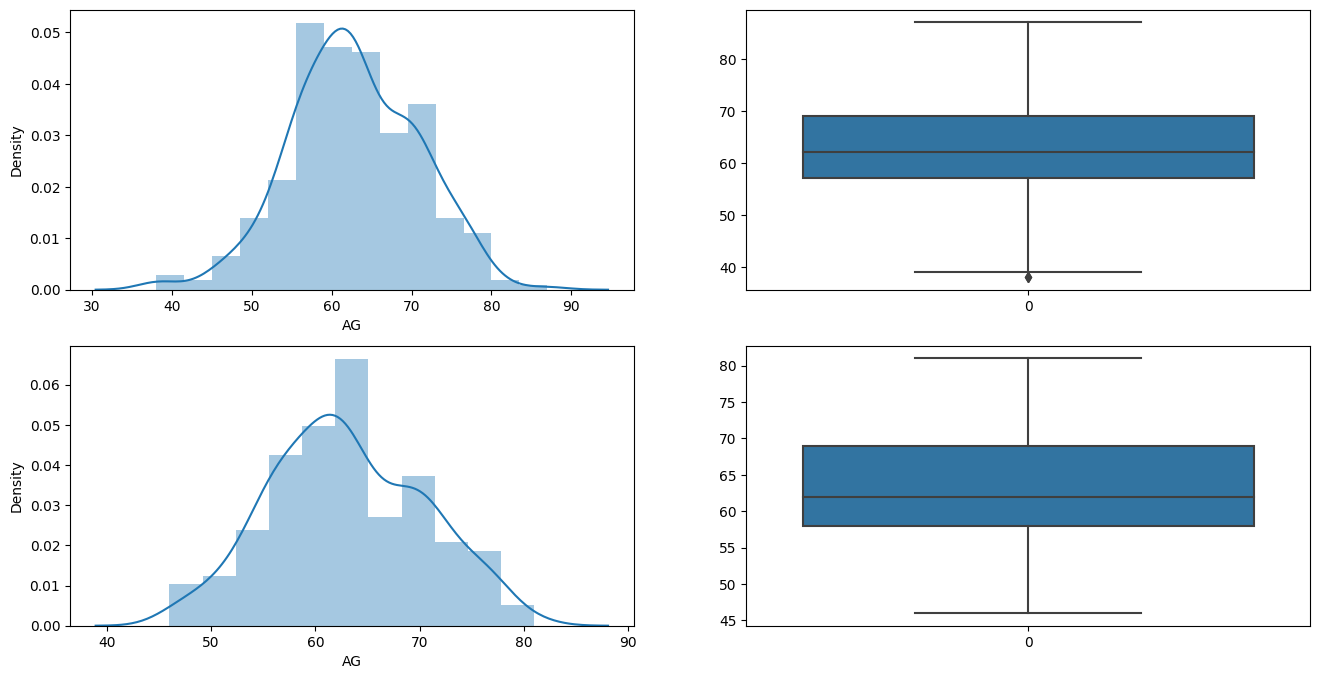

In [22]:
#ploting the outlayer removing 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['AG'])
plt.subplot(2,2,2)
sns.boxplot(data['AG'])
plt.subplot(2,2,3)
sns.distplot(new_df['AG'])
plt.subplot(2,2,4)
sns.boxplot(new_df['AG'])
plt.show()

<AxesSubplot: >

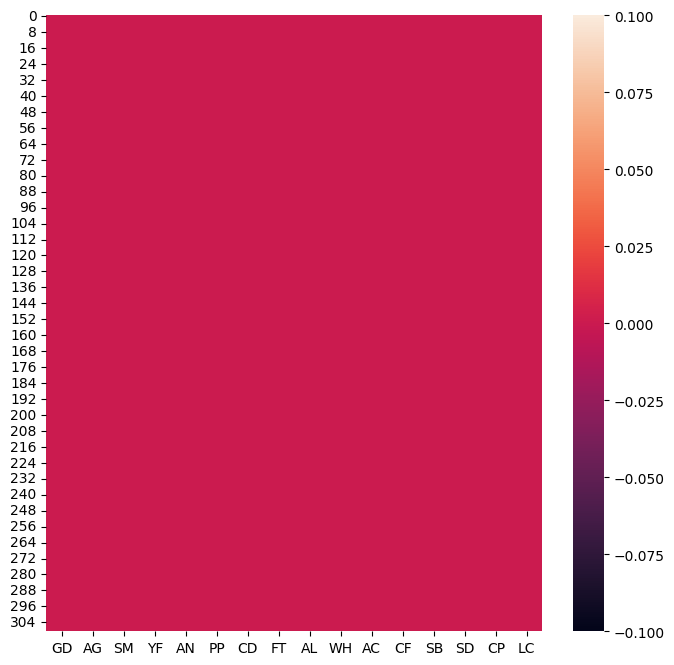

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

In [24]:
data_boxcox = data.copy()
X = data_boxcox.drop(['LC'],axis=1)
Y = data_boxcox['LC']

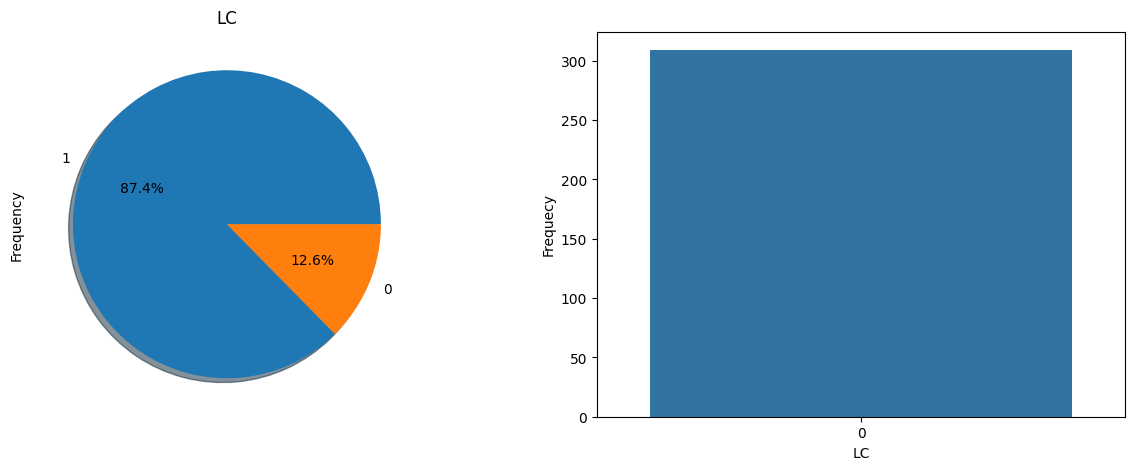

In [25]:
#Plot the diabetic Values
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(data['LC'])
#plt.title("Frequency of Heart Disease in Dataset")
plt.xlabel("LC")
plt.ylabel("Frequecy")

#Piechart show
data['LC'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('LC')
ax[0].set_ylabel('Frequency')
plt.show()

In [30]:

#To keep BoxCox data as it is to use the same for later.
data_bal = data_boxcox.copy()

#Getting seperated data with 1 and 0 status.
df_majority = data_bal[data_bal.LC==1]
df_minority = data_bal[data_bal.LC==0]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class
df_manjority_downsampled = resample(df_majority,replace=False,n_samples=150,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.LC.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_minority_Upsampled = resample(df_minority,replace=True,n_samples=350,random_state=123)
df_Upsampled = pd.concat([df_majority,df_minority_Upsampled])
print("Upsampled data:->\n",df_Upsampled.LC.value_counts())

Downsampled data:->
 1    150
0     39
Name: LC, dtype: int64
Upsampled data:->
 0    350
1    270
Name: LC, dtype: int64


Text(0.5, 0, 'Outcome')

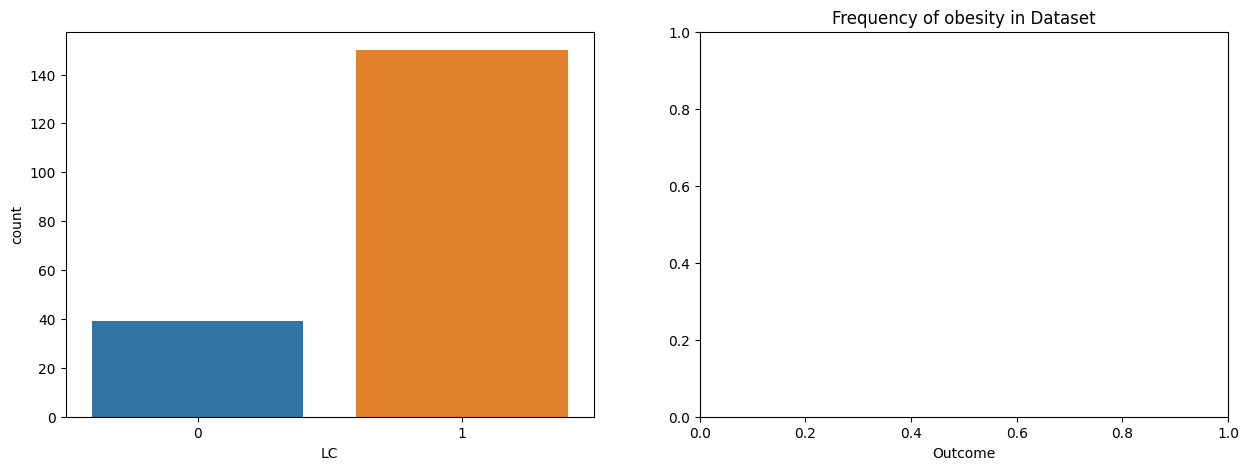

In [31]:
#Plot the diabetic Values
# f,ax=plt.subplots(1,2,figsize=(15,5))
# sns.countplot(df_downsampled['NObeyesdad'])
# plt.title("Frequency of Heart Disease in Dataset")
# plt.xlabel("NObeyesdad")
# plt.ylabel("Frequecy")
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='LC', data=df_downsampled, ax=ax[0])
plt.title("Frequency of obesity in Dataset")
plt.xlabel("Outcome")

#Piechart show
# df_downsampled['NObeyesdad'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('NObeyesdad')
# ax[0].set_ylabel('Frequency')
# plt.show()

Text(0.5, 0, 'Outcome')

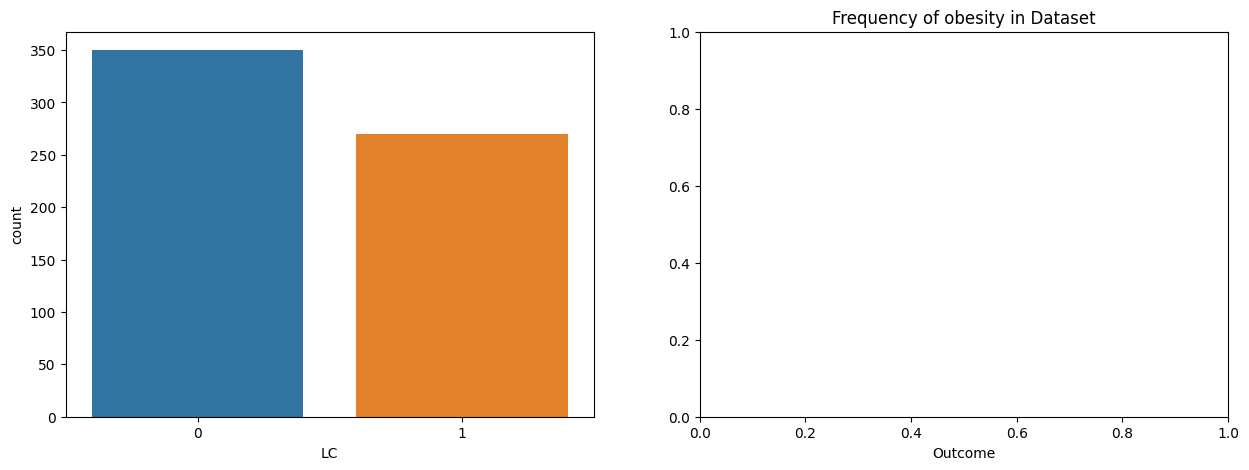

In [32]:
# #Plot the diabetic Values
# f,ax=plt.subplots(1,2,figsize=(15,5))
# sns.countplot(df_Upsampled['NObeyesdad'])
# plt.title("Frequency of Heart Disease in Dataset")
# plt.xlabel('NObeyesdad')
# plt.ylabel("Frequecy")
# #Piechart show
# df_Upsampled['NObeyesdad'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('NObeyesdad')
# ax[0].set_ylabel('Frequency')
# plt.show()
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='LC', data=df_Upsampled, ax=ax[0])
plt.title("Frequency of obesity in Dataset")
plt.xlabel("Outcome")

In [33]:
#lets describe the data
df_Upsampled.describe().T

,count,mean,std,min,25%,50%,75%,max
GD,620.0,0.467742,0.499361,0.000000,0.0,0.0,1.0,1.0
AG,620.0,61.954043,7.926498,38.042235,58.0,62.0,67.0,87.0
SM,620.0,1.525806,0.499737,1.000000,1.0,2.0,2.0,2.0
YF,620.0,1.453226,0.498209,1.000000,1.0,1.0,2.0,2.0
AN,620.0,1.403226,0.490941,1.000000,1.0,1.0,2.0,2.0
PP,620.0,1.383871,0.486720,1.000000,1.0,1.0,2.0,2.0
CD,620.0,1.448387,0.497731,1.000000,1.0,1.0,2.0,2.0
FT,620.0,1.566129,0.496008,1.000000,1.0,2.0,2.0,2.0
AL,620.0,1.346774,0.476327,1.000000,1.0,1.0,2.0,2.0
WH,620.0,1.382258,0.486331,1.000000,1.0,1.0,2.0,2.0


In [34]:
#lets describe the data
df_downsampled.describe().T

,count,mean,std,min,25%,50%,75%,max
GD,189.0,0.486772,0.501153,0.000000,0.0,0.0,1.0,1.0
AG,189.0,62.635368,8.151377,38.042235,57.0,63.0,69.0,87.0
SM,189.0,1.571429,0.496186,1.000000,1.0,2.0,2.0,2.0
YF,189.0,1.560847,0.497602,1.000000,1.0,2.0,2.0,2.0
AN,189.0,1.476190,0.500759,1.000000,1.0,1.0,2.0,2.0
PP,189.0,1.497354,0.501321,1.000000,1.0,1.0,2.0,2.0
CD,189.0,1.518519,0.500984,1.000000,1.0,2.0,2.0,2.0
FT,189.0,1.629630,0.484186,1.000000,1.0,2.0,2.0,2.0
AL,189.0,1.534392,0.500141,1.000000,1.0,2.0,2.0,2.0
WH,189.0,1.523810,0.500759,1.000000,1.0,2.0,2.0,2.0


In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
import itertools
import xgboost as xgb

In [36]:
from sklearn import  metrics 
X = df_Upsampled.drop(['LC'],axis=1)
Y = df_Upsampled['LC']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier(learning_rate =0.1,n_estimators=100000,max_depth=6,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#confusion_matrix(XGBR,X_test,y_test,labels=["Heart Disease","No-Heart Disease"],cm=plt.cm.Blues)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.93      0.98      0.95        52

    accuracy                           0.96       124
   macro avg       0.96      0.96      0.96       124
weighted avg       0.96      0.96      0.96       124

0.9596774193548387


In [37]:
data.columns

Index(['GD', 'AG', 'SM', 'YF', 'AN', 'PP', 'CD', 'FT', 'AL', 'WH', 'AC', 'CF',
       'SB', 'SD', 'CP', 'LC'],
      dtype='object')

In [38]:
featur_names = ['GD', 'AG', 'SM', 'YF', 'AN', 'PP', 'CD', 'FT', 'AL', 'WH', 'AC', 'CF',
       'SB', 'SD', 'CP', 'LC']
features = XGBR.feature_importances_
features

array([0.03574988, 0.03850698, 0.03640018, 0.03769396, 0.11977023,
       0.03605428, 0.03816878, 0.03686453, 0.04151097, 0.03695683,
       0.03808523, 0.03844952, 0.03728283, 0.3921703 , 0.03633539],
      dtype=float32)

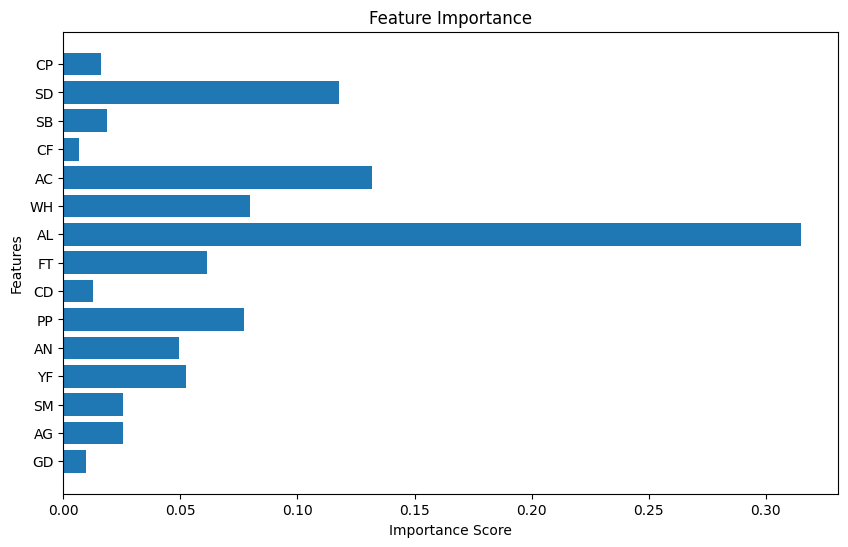

In [42]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = xgbr.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [43]:
X = np.array(df_Upsampled[['GD', 'AG', 'SM', 'YF', 'AN', 'PP', 'CD', 'FT', 'AL', 'WH', 'AC', 'CF',
       'SB', 'SD', 'CP', 'LC']])
Y = np.array(df_Upsampled.LC.T)
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)


models = []
models.append(("XGB",XGBClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))
models.append(("LightGBM",LGBMClassifier()))
models.append(("Catboost",CatBoostClassifier()))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.93      0.98      0.95        52

    accuracy                           0.96       124
   macro avg       0.96      0.96      0.96       124
weighted avg       0.96      0.96      0.96       124

0.9596774193548387


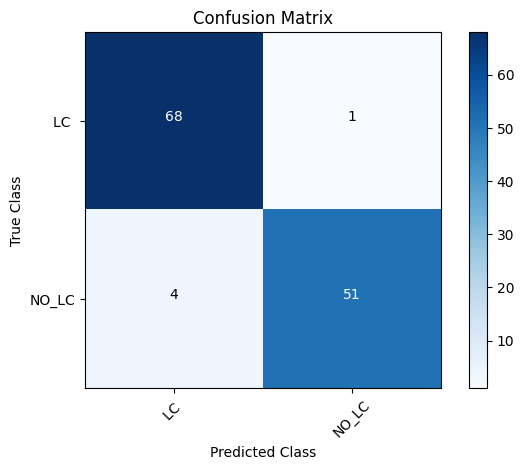

In [44]:
#XGB
classes = ["LC ", "NO_LC"]
X = df_Upsampled.drop(['LC'],axis=1)
Y = df_Upsampled['LC']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model1 = XGBClassifier (learning_rate =0.1,n_estimators=100000,max_depth=6,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)

#(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)

Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
fpr_Model1, tpr_Model1, thresholds_Model1 = roc_curve(y_test, y_pred)
roc_auc_Model1 = auc (fpr_Model1, tpr_Model1)
precision_Model1, recall_Model1, th_Model1 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

#confusion_matrix(Model1,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

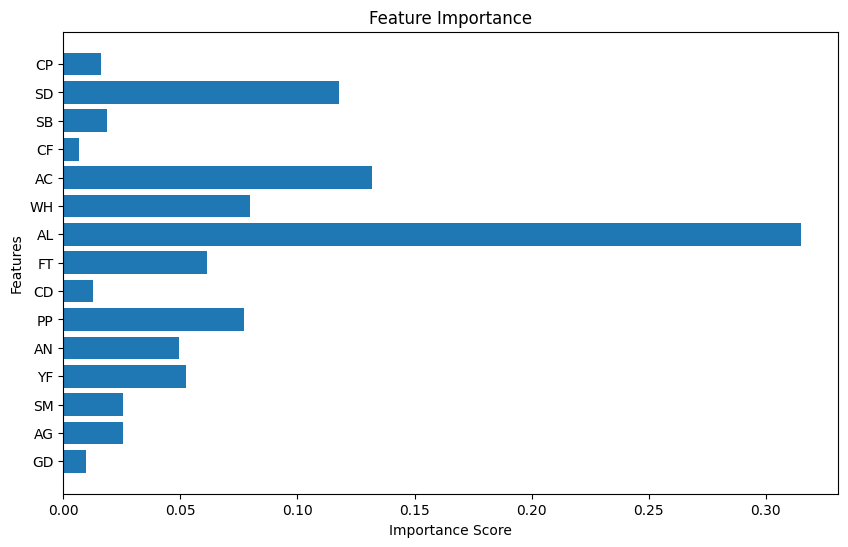

In [45]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = xgbr.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        69
           1       0.93      0.93      0.93        55

    accuracy                           0.94       124
   macro avg       0.93      0.93      0.93       124
weighted avg       0.94      0.94      0.94       124

0.9354838709677419


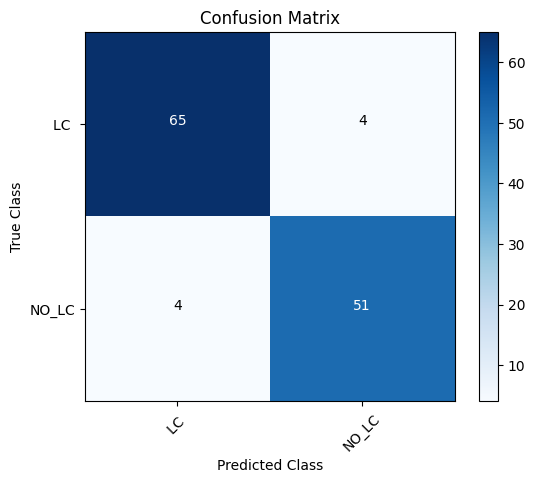

In [46]:
#Ada Boost
display_labels=["LC","NO_LC"]
X = df_Upsampled.drop(['LC'],axis=1)
Y = df_Upsampled['LC']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model2 = AdaBoostClassifier(n_estimators=20000,learning_rate=0.1,random_state=None)
#(random_state=0, learning_rate =0.1,n_estimators=100)
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
fpr_Model2, tpr_Model2, thresholds_Model2 = roc_curve(y_test, y_pred)
roc_auc_Model2 = auc (fpr_Model2, tpr_Model2)
precision_Model2, recall_Model2, th_Model2 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
# confusion_matrix(Model2,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")



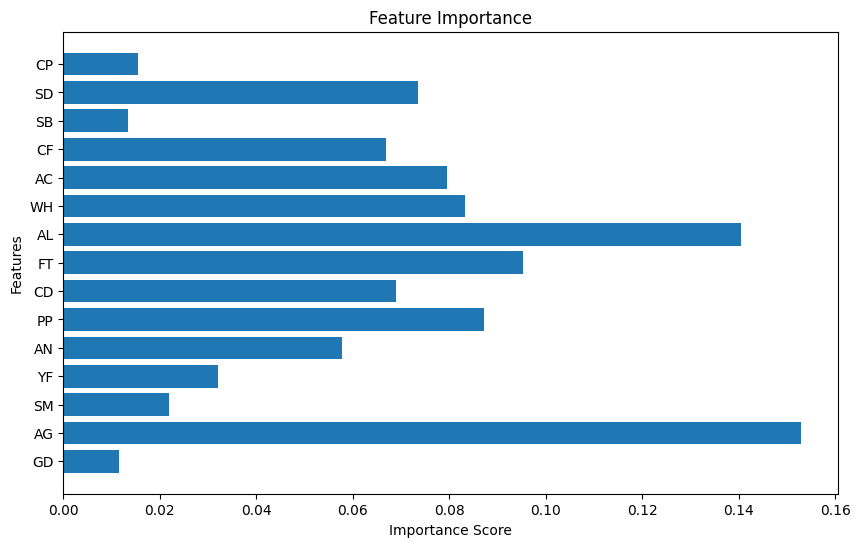

In [47]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = ada.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        71
           1       0.96      1.00      0.98        53

    accuracy                           0.98       124
   macro avg       0.98      0.99      0.98       124
weighted avg       0.98      0.98      0.98       124

0.9838709677419355


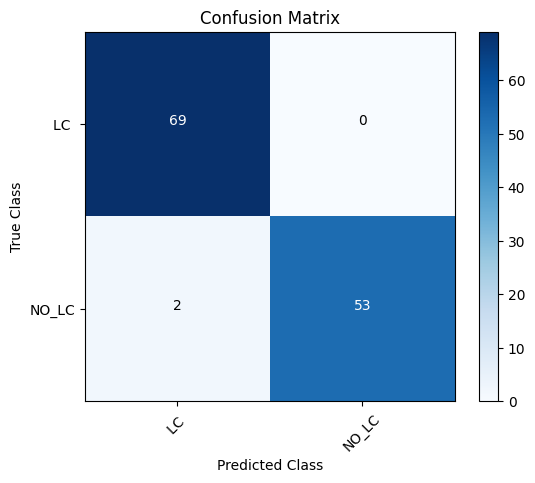

In [48]:
# GB Boost
X = df_Upsampled.drop(['LC'],axis=1)
Y = df_Upsampled['LC']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model3 = GradientBoostingClassifier(random_state=45, learning_rate =0.1,n_estimators=10000,max_depth=10)
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
fpr_Model3, tpr_Model3, thresholds_Model3 = roc_curve(y_test, y_pred)
roc_auc_Model3 = auc (fpr_Model3, tpr_Model3)
precision_Model3, recall_Model3, th_Model3 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model3,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")


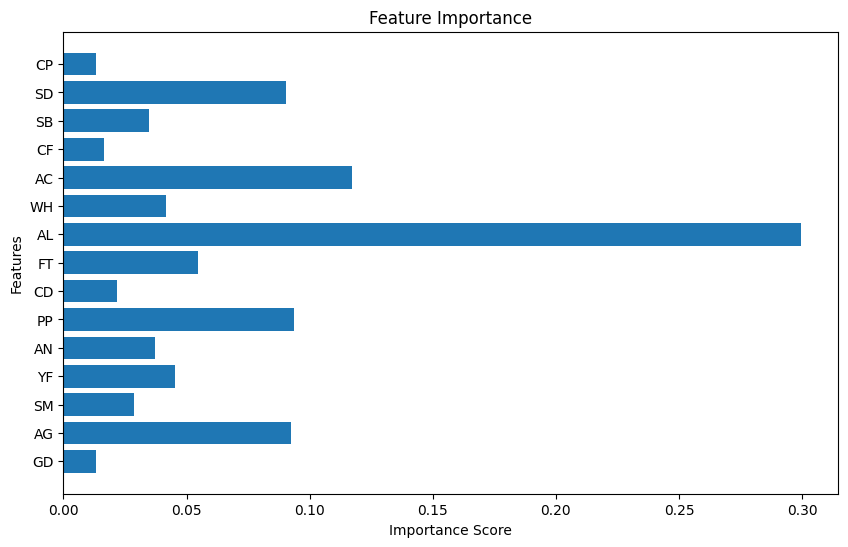

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = gbr.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        72
           1       0.95      1.00      0.97        52

    accuracy                           0.98       124
   macro avg       0.97      0.98      0.98       124
weighted avg       0.98      0.98      0.98       124

0.9758064516129032


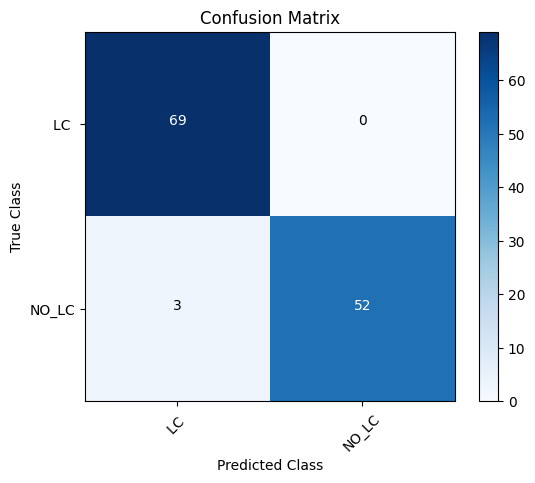

In [50]:
#LightGBM
X = df_Upsampled.drop(['LC'],axis=1)
Y = df_Upsampled['LC']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model4 = LGBMClassifier(random_state=45, n_estimators= 10000, max_depth=8)
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
fpr_Model4, tpr_Model4, thresholds_Model4 = roc_curve(y_test, y_pred)
roc_auc_Model4 = auc (fpr_Model4, tpr_Model4)
precision_Model4, recall_Model4, th_Model4 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model4,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")


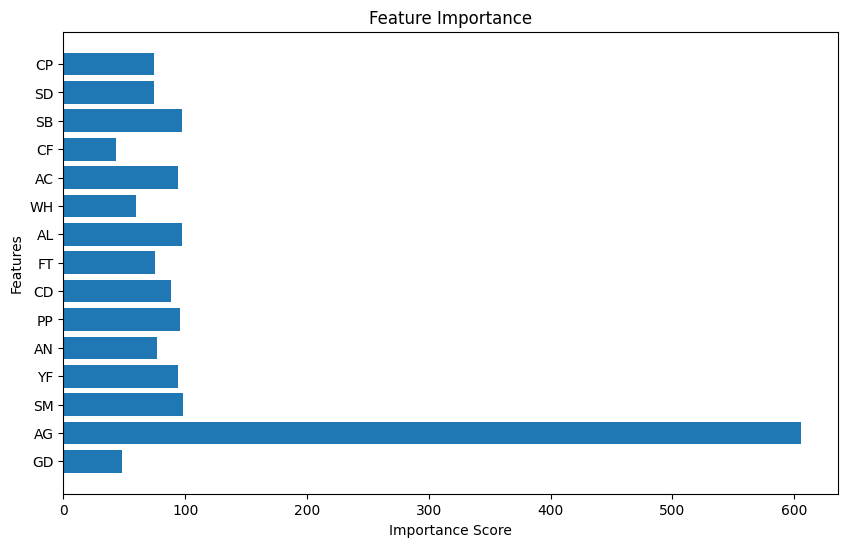

In [51]:
import lightgbm as lgb
lgb_reg = lgb.LGBMRegressor()
lgb_reg.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = lgb_reg.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


Learning rate set to 0.007637
0:	learn: 0.6830079	total: 162ms	remaining: 2m 41s
1:	learn: 0.6749570	total: 165ms	remaining: 1m 22s
2:	learn: 0.6667429	total: 166ms	remaining: 55.2s
3:	learn: 0.6572023	total: 168ms	remaining: 41.9s
4:	learn: 0.6489649	total: 170ms	remaining: 33.9s
5:	learn: 0.6409089	total: 172ms	remaining: 28.6s
6:	learn: 0.6314050	total: 175ms	remaining: 24.8s
7:	learn: 0.6267145	total: 176ms	remaining: 21.8s
8:	learn: 0.6189014	total: 178ms	remaining: 19.6s
9:	learn: 0.6118541	total: 180ms	remaining: 17.8s
10:	learn: 0.6039276	total: 182ms	remaining: 16.3s
11:	learn: 0.5959783	total: 184ms	remaining: 15.1s
12:	learn: 0.5887232	total: 186ms	remaining: 14.1s
13:	learn: 0.5806805	total: 187ms	remaining: 13.2s
14:	learn: 0.5739016	total: 189ms	remaining: 12.4s
15:	learn: 0.5684605	total: 191ms	remaining: 11.8s
16:	learn: 0.5614866	total: 193ms	remaining: 11.2s
17:	learn: 0.5556579	total: 196ms	remaining: 10.7s
18:	learn: 0.5501627	total: 198ms	remaining: 10.2s
19:	learn

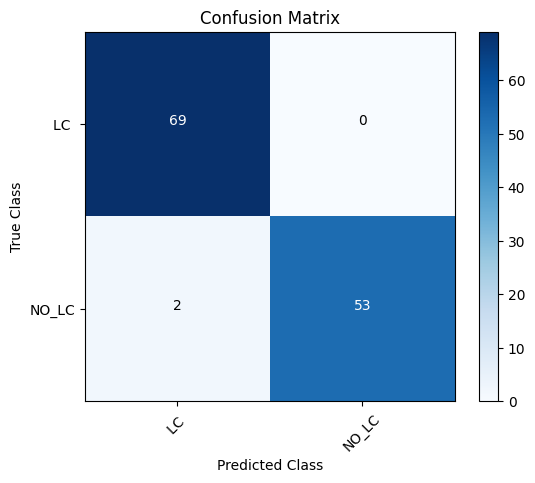

In [52]:
#CAT Boost
X = df_Upsampled.drop(['LC'],axis=1)
Y = df_Upsampled['LC']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model5 = CatBoostClassifier(random_state=45, n_estimators=1000, max_depth=7)
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
fpr_Model5, tpr_Model5, thresholds_Model5 = roc_curve(y_test, y_pred)
roc_auc_Model5 = auc (fpr_Model5, tpr_Model5)
precision_Model5, recall_Model5, th_Model5 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model5,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")


Learning rate set to 0.036649
0:	learn: 0.4844785	total: 1.05ms	remaining: 1.05s
1:	learn: 0.4749397	total: 1.95ms	remaining: 974ms
2:	learn: 0.4651254	total: 2.84ms	remaining: 943ms
3:	learn: 0.4570557	total: 3.73ms	remaining: 930ms
4:	learn: 0.4493526	total: 4.6ms	remaining: 916ms
5:	learn: 0.4407125	total: 5.47ms	remaining: 907ms
6:	learn: 0.4305713	total: 6.5ms	remaining: 922ms
7:	learn: 0.4217905	total: 7.57ms	remaining: 939ms
8:	learn: 0.4142478	total: 9.02ms	remaining: 993ms
9:	learn: 0.4064927	total: 10.2ms	remaining: 1.01s
10:	learn: 0.4029637	total: 10.5ms	remaining: 942ms
11:	learn: 0.3949810	total: 11.4ms	remaining: 937ms
12:	learn: 0.3877618	total: 12.3ms	remaining: 936ms
13:	learn: 0.3800839	total: 13.2ms	remaining: 930ms
14:	learn: 0.3741481	total: 14.1ms	remaining: 925ms
15:	learn: 0.3683197	total: 15ms	remaining: 920ms
16:	learn: 0.3620193	total: 15.9ms	remaining: 918ms
17:	learn: 0.3560979	total: 16.9ms	remaining: 920ms
18:	learn: 0.3501074	total: 17.8ms	remaining: 92

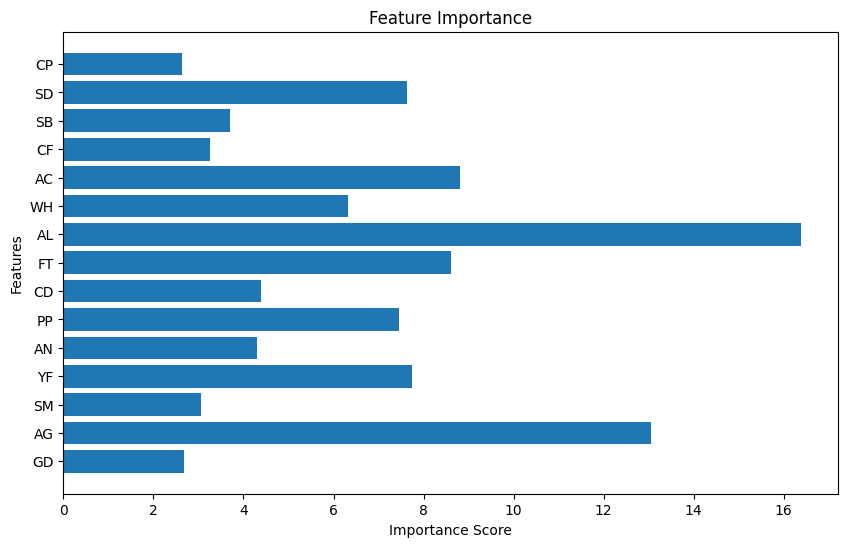

In [53]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = catboost.get_feature_importance()
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [54]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [55]:
X = data.drop(['LC'],axis=1)
Y = data['LC']

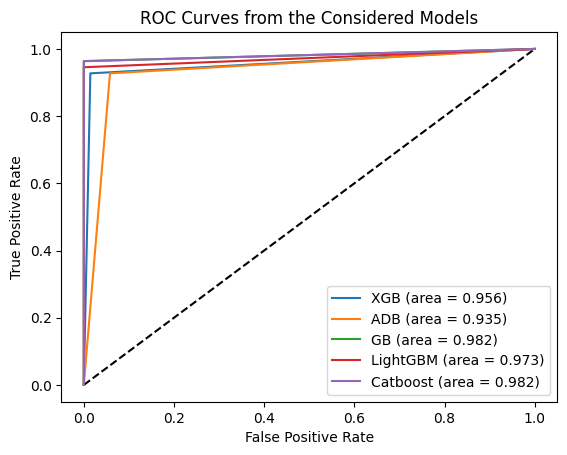

In [56]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_Model1, tpr_Model1, label='XGB (area = %0.3f)' % roc_auc_Model1)
plt.plot(fpr_Model2, tpr_Model2, label='ADB (area = %0.3f)' % roc_auc_Model2)
plt.plot(fpr_Model3, tpr_Model3, label='GB (area = %0.3f)' % roc_auc_Model3)
plt.plot(fpr_Model4, tpr_Model4, label='LightGBM (area = %0.3f)' % roc_auc_Model4)
plt.plot(fpr_Model5, tpr_Model5, label='Catboost (area = %0.3f)' % roc_auc_Model5)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves from the Considered Models')
plt.legend(loc='best')
plt.show()

In [59]:
# import matplotlib.pyplot as plt

# # Sample accuracy data
# adaboost_accuracy = 0.945
# gradient_boosting_accuracy =0.991
# xgboost_accuracy = 0.964
# LGBM_boosting_accuracy =0.973
# CatBoost_accuracy = 0.991

# # Plot the bar graph with percentages
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_axes([0, 0, 1, 1])
# models = ['AdaBoost', 'Gradient Boosting', 'XGBoost', 'LGBM Boosting', 'CatBoosting']
# accuracies = [adaboost_accuracy, gradient_boosting_accuracy, xgboost_accuracy, LGBM_boosting_accuracy, CatBoost_accuracy]
# bars = ax.bar(models, accuracies)

# # Add percentage values on top of each bar
# for bar in bars:
#     height = bar.get_height()
#     ax.annotate(f'{height:.3%}',
#                 xy=(bar.get_x() + bar.get_width() / 2, height),
#                 xytext=(0, 3),
#                 textcoords="offset points",
#                 ha='center', va='bottom', fontsize=12)

# plt.title('Boosting Techniques Accuracy Comparison')
# plt.xlabel('Boosting Technique')
# plt.ylabel('Accuracy')
# plt.show()
